In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.dropna(subset=['Age'],inplace=True)
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

In [5]:
df.dropna(subset=['Cabin'],inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [6]:
df['Embarked'].fillna(value=0,inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [7]:
df['Survived'].value_counts()

Survived
1    125
0     60
Name: count, dtype: int64

In [8]:
# 1. Relation between Pclass and Survived
print("Relation between Pclass and Survived:")
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


Relation between Pclass and Survived:


,Pclass,Survived
1,2,0.800
0,1,0.675
2,3,0.500


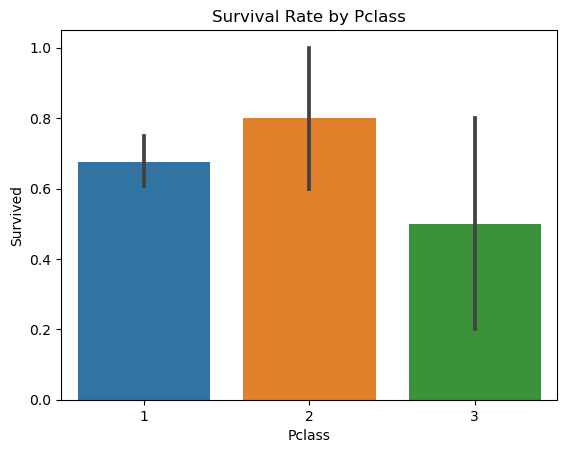

In [9]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Pclass")
plt.show()


In [10]:
# 2. Relation between Sex and Survived
print("\nRelation between Sex and Survived:")
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


Relation between Sex and Survived:


,Sex,Survived
0,female,0.933333
1,male,0.431579


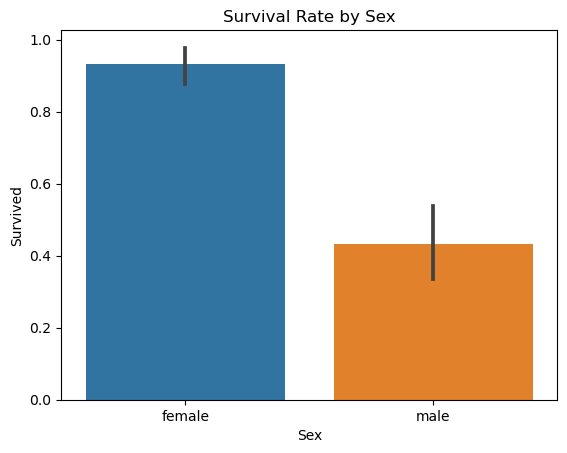

In [11]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Sex")
plt.show()

In [12]:
# 3. Relation between Embarked and Survived
print("\nRelation between Embarked and Survived:")
df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)


Relation between Embarked and Survived:


,Embarked,Survived
0,0,1.000000
1,C,0.738462
3,S,0.637931
2,Q,0.500000


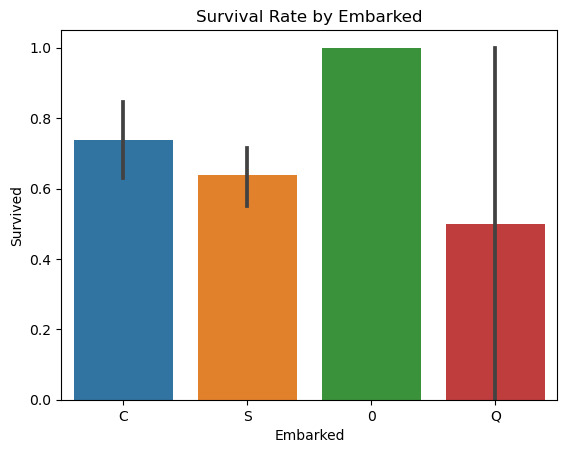

In [13]:
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title("Survival Rate by Embarked")
plt.show()

In [14]:
# 1. Find the total number of survivors from the 3rd PClass
total_survivors_pclass3 = df[(df['Pclass'] == 3) & (df['Survived'] == 1)].shape[0]
print("Total number of survivors from Pclass(3): " ,total_survivors_pclass3)


Total number of survivors from Pclass(3):  5


In [15]:
# 2. Find the total number of males who died in the accident
total_male_died = df[(df['Sex'] == 'male') & (df['Survived'] == 0)].shape[0]
print("Total number of males who died in the accident: ",total_male_died)



Total number of males who died in the accident:  54


In [16]:
# 3. Find the total number of survivors who embarked the ship (male passengers)
total_male_survivors_embarked = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]['Embarked'].count()
print("Total number of male survivors who embarked the ship: ",total_male_survivors_embarked)

Total number of male survivors who embarked the ship:  41
